In [1]:
import nglview as nv
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults


In [2]:
h2so4 = Chem.AddHs(Chem.MolFromSmiles('OS(=O)(=O)O'))
AllChem.EmbedMultipleConfs(h2so4, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
nv.show_rdkit(h2so4)

In [3]:
smiles="c1ccccc1"
m = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
nv.show_rdkit(m)

In [4]:
m = Chem.AddHs(Chem.MolFromSmiles('COc1ccc2[C@H](O)[C@@H](COc2c1)N3CCC(O)(CC3)c4ccc(F)cc4'))
AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
view = nv.show_rdkit(m)
view

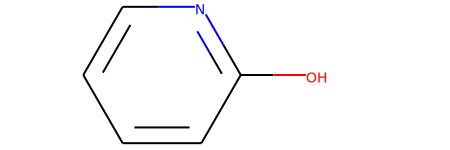

In [5]:
m = Chem.MolFromSmiles('c1cccnc1O')
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')
SVG(moltosvg(m))


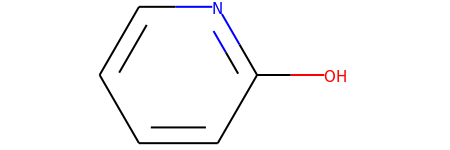

In [6]:
m

In [7]:
AllChem.EmbedMultipleConfs(m, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
nv.show_rdkit(m)

In [8]:
DrawingOptions.bondLineWidth=2


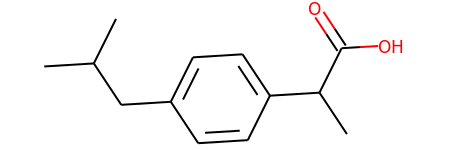

In [9]:
ibu = Chem.MolFromSmiles('CC(C)Cc1ccc(cc1)C(C)C(=O)O')
ibu

In [10]:
ibu.GetNumAtoms()


15

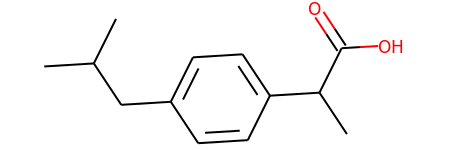

In [11]:
DrawingOptions.includeAtomNumbers=True
ibu

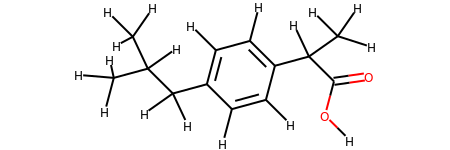

In [12]:
from rdkit.Chem import AllChem
ibuH = AllChem.AddHs(ibu)
DrawingOptions.includeAtomNumbers=False

ibuH

In [13]:
AllChem.EmbedMultipleConfs(ibuH, useExpTorsionAnglePrefs=True, useBasicKnowledge=True)
nv.show_rdkit(ibuH)